In [1]:
import pandas as pd
import numpy as np
import random

random.seed(32)

In [2]:
df = pd.read_csv('oldies/100_Nodes_Data.csv')
df_e = pd.read_csv('oldies/100_Edges_Data.csv')

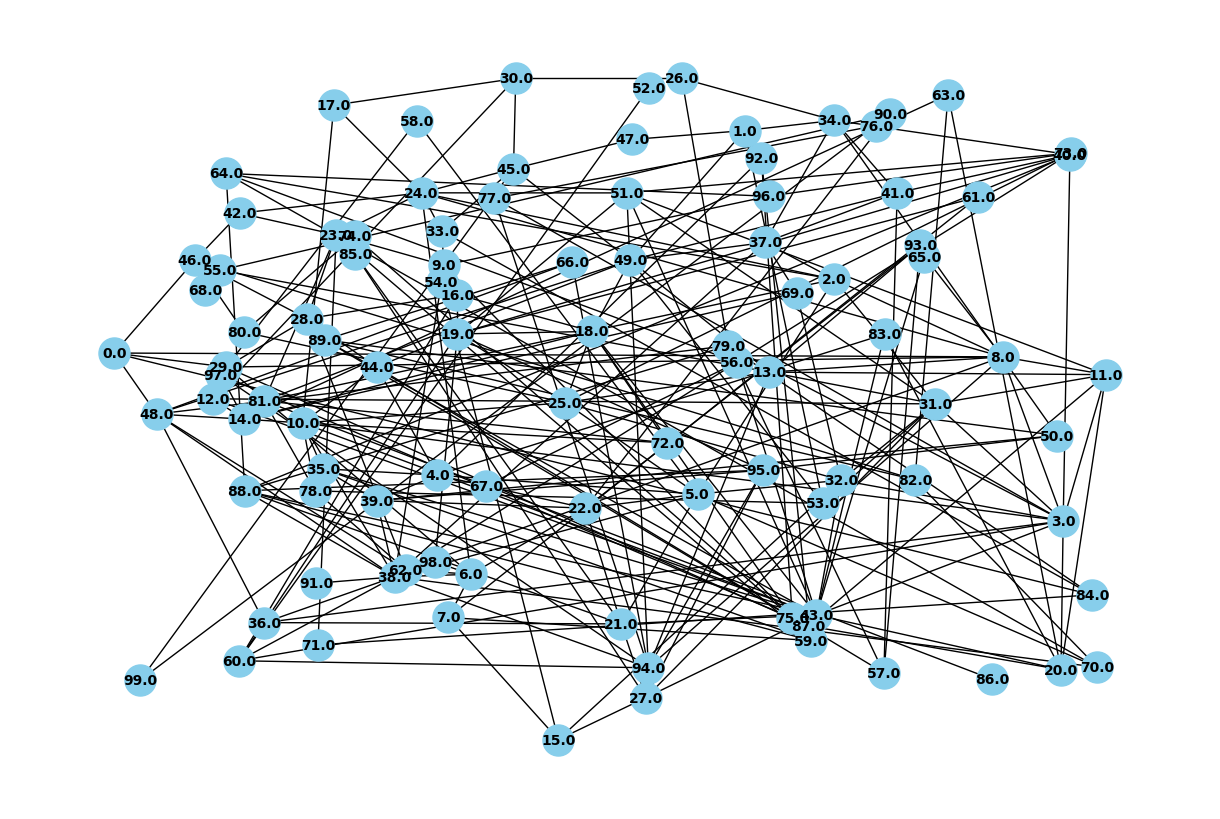

In [3]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes with attributes
for index, row in df.iterrows():
    G.add_node(row['id'], pos=(row['x'], row['y']), cpu=row['cpu'], memory=row['memory'], storage=row['storage'], bandwidth=row['bandwidth'])

# Add edges with attributes
for index, row in df_e.iterrows():
    G.add_edge(row['source'], row['target'], bandwidth=row['bandwidth'], latency=row['latency'])

# Get positions for the nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

In [4]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Number of nodes: 100
Number of edges: 253


In [5]:
# 1. Ler o arquivo CSV original com mais de 145 arestas
arquivo_arestas = "oldies/100_Edges_Data.csv"  # Substitua pelo nome correto
df_arestas = pd.read_csv(arquivo_arestas)

# 2. Criar um grafo para representar a topologia
G = nx.Graph()

for _, row in df_arestas.iterrows():
    G.add_edge(row["source"], row["target"], bandwidth=row["bandwidth"], latency=row["latency"])

# Verificar o número total de arestas
num_arestas_iniciais = G.number_of_edges()
num_arestas_desejadas = 145

# 3. Remover arestas de forma controlada
while G.number_of_edges() > num_arestas_desejadas:
    edge_to_remove = random.choice(list(G.edges()))
    G.remove_edge(*edge_to_remove)
    
    # Garantir que o grafo continua conectado
    if not nx.is_connected(G):
        G.add_edge(*edge_to_remove)  # Reverter remoção se desconectar o grafo

print(G.edges.data())

# 4. Criar um novo DataFrame com as arestas finais
edges_data = []
for i, (source, target) in enumerate(G.edges()):
    edge_attrs = G.get_edge_data(source, target)
    edges_data.append({
        "id": i,
        "source": source,
        "target": target,
        "bandwidth": edge_attrs.get("bandwidth", 0),  # Use .get() to avoid KeyError
        "latency": edge_attrs.get("latency", 0)       # Use .get() to avoid KeyError
    })

df_novas_arestas = pd.DataFrame(edges_data)

# the id nodes must be integers
df['id'] = df['id'].astype(int)

# the source and target columns must be integers
df_novas_arestas['source'] = df_novas_arestas['source'].astype(int)
df_novas_arestas['target'] = df_novas_arestas['target'].astype(int)

# 5. Salvar o novo arquivo CSV
arquivo_novo_arestas = "synthetic_edges.csv"
df_novas_arestas.to_csv(arquivo_novo_arestas, index=False)

arquivo_novo_nos = "synthetic_nodes.csv"
df.to_csv(arquivo_novo_nos, index=False)

print(f"Novo arquivo CSV salvo como: {arquivo_novo_arestas}")

[(0.0, 48.0, {'bandwidth': 20.0, 'latency': 0.0751}), (29.0, 12.0, {'bandwidth': 80.0, 'latency': 0.0188}), (29.0, 87.0, {'bandwidth': 137.0, 'latency': 0.0167}), (29.0, 8.0, {'bandwidth': 65.0, 'latency': 0.0136}), (48.0, 14.0, {'bandwidth': 77.0, 'latency': 0.0195}), (48.0, 36.0, {'bandwidth': 90.0, 'latency': 0.0169}), (48.0, 66.0, {'bandwidth': 105.0, 'latency': 0.0225}), (46.0, 28.0, {'bandwidth': 78.0, 'latency': 0.0193}), (1.0, 47.0, {'bandwidth': 80.0, 'latency': 0.035}), (1.0, 34.0, {'bandwidth': 90.0, 'latency': 0.0167}), (1.0, 53.0, {'bandwidth': 74.0, 'latency': 0.0195}), (34.0, 26.0, {'bandwidth': 43.0, 'latency': 0.035}), (49.0, 13.0, {'bandwidth': 91.0, 'latency': 0.0167}), (49.0, 45.0, {'bandwidth': 91.0, 'latency': 0.0166}), (49.0, 41.0, {'bandwidth': 40.0, 'latency': 0.0144}), (2.0, 37.0, {'bandwidth': 78.0, 'latency': 0.0193}), (2.0, 81.0, {'bandwidth': 71.0, 'latency': 0.0203}), (2.0, 64.0, {'bandwidth': 53.0, 'latency': 0.0751}), (2.0, 5.0, {'bandwidth': 94.0, 'lat

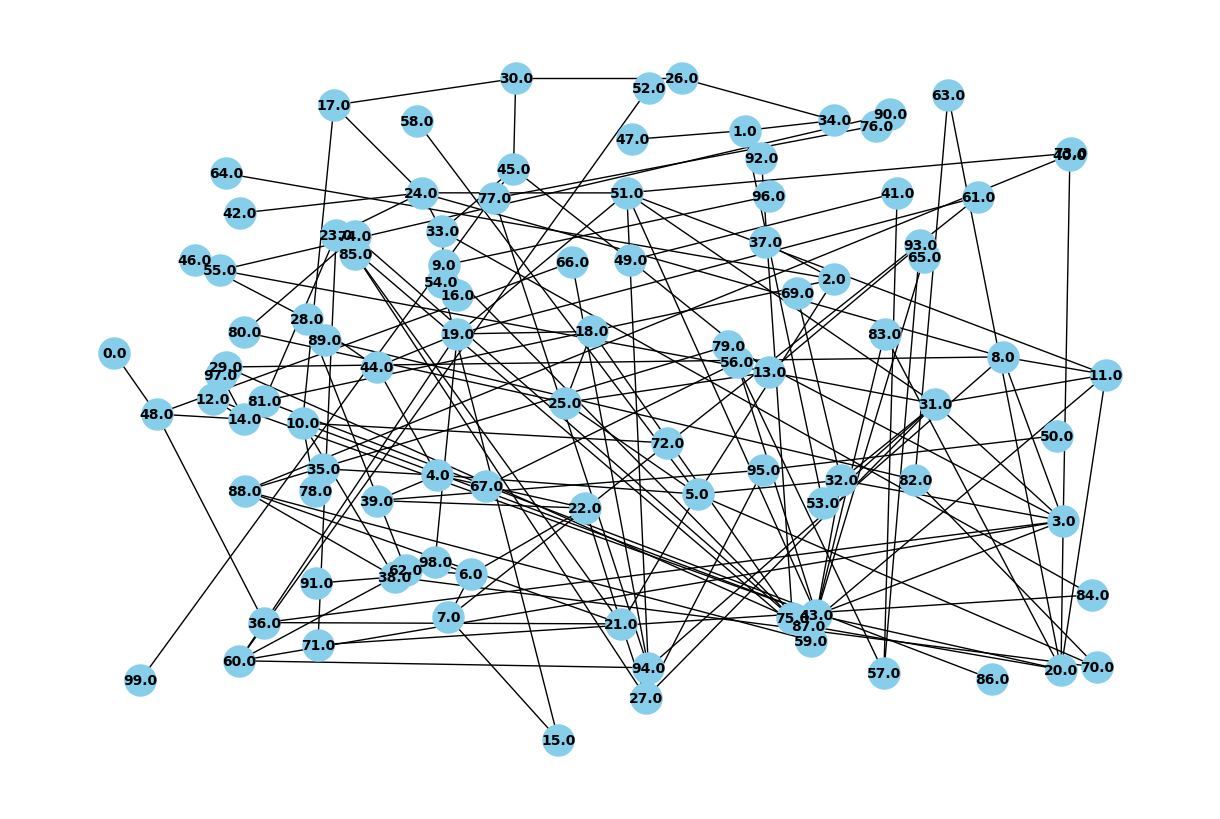

In [6]:
# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()